In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm

data_men = pd.read_csv ("./data/ANSUR II MALE Public.csv", encoding='latin-1')
data_women = pd.read_csv ("./data/ANSUR II FEMALE Public.csv", encoding='latin-1')
print(data_men.columns)

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)


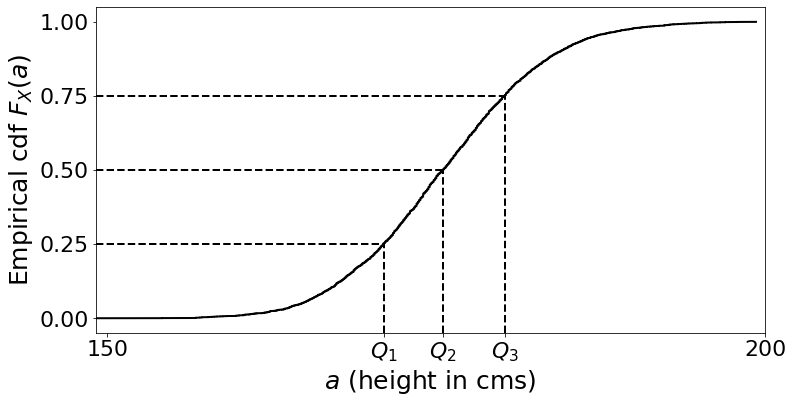

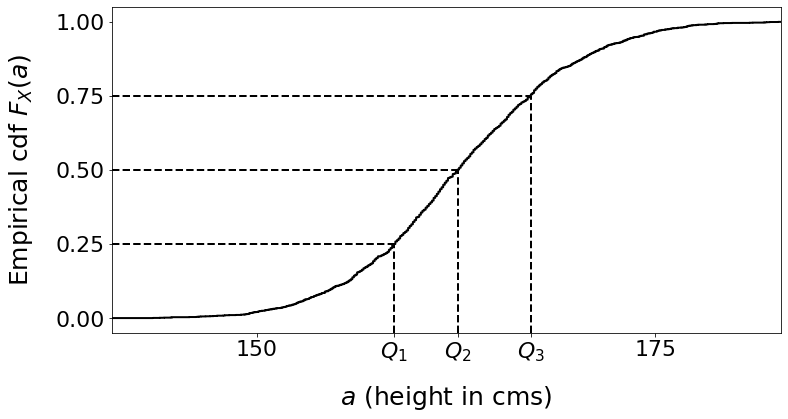

In [15]:
def empirical_cdf(x):
    x_sorted = np.sort(x)
    cdf = np.arange(1, len(x_sorted)+1) / float(len(x_sorted))
    return x_sorted, cdf

stature_men = data_men['stature'] / 10.
stature_women = data_women['stature'] / 10.
sorted_stature_men, cdf_men = empirical_cdf(stature_men) 
sorted_stature_women, cdf_women = empirical_cdf(stature_women) 

median_men = np.median(stature_men)
first_quartile_men = np.percentile(stature_men,25)
third_quartile_men = np.percentile(stature_men,75)
median_women = np.median(stature_women)
first_quartile_women = np.percentile(stature_women,25)
third_quartile_women = np.percentile(stature_women,75)

font_size = 25
font_size_legend = 25
font_size_ticks = 22

x_min = sorted_stature_men[0]
x_max = sorted_stature_men[-1]
y_min = -0.05
y_max = 1.05
plt.figure(figsize=(12,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_stature_men,cdf_men,linewidth=2,color="black")
plt.hlines(0.25,x_min,first_quartile_men,linewidth=2,ls='dashed',color="black")
plt.vlines(first_quartile_men,y_min,0.25,linewidth=2,ls='dashed',color="black")
plt.hlines(0.5,x_min,median_men,linewidth=2,ls='dashed',color="black")
plt.vlines(median_men,y_min,0.5,linewidth=2,ls='dashed',color="black")
plt.hlines(0.75,x_min,third_quartile_men,linewidth=2,ls='dashed',color="black")
plt.vlines(third_quartile_men,y_min,0.75,linewidth=2,ls='dashed',color="black")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (height in cms)',fontsize=font_size)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size)
plt.xticks([150,first_quartile_men,median_men,third_quartile_men,200],
           labels=["150","$Q_1$","$Q_2$","$Q_3$","200"])
plt.yticks([0,0.25,0.5,0.75,1])
plt.savefig('plots/empirical_cdf_stature_men.pdf',bbox_inches="tight")

x_min = sorted_stature_women[0]
x_max = sorted_stature_women[-1]
y_min = -0.05
y_max = 1.05
plt.figure(figsize=(12,6))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.step(sorted_stature_women,cdf_women,linewidth=2,color="black")
plt.hlines(0.25,x_min,first_quartile_women,linewidth=2,ls='dashed',color="black")
plt.vlines(first_quartile_women,y_min,0.25,linewidth=2,ls='dashed',color="black")
plt.hlines(0.5,x_min,median_women,linewidth=2,ls='dashed',color="black")
plt.vlines(median_women,y_min,0.5,linewidth=2,ls='dashed',color="black")
plt.hlines(0.75,x_min,third_quartile_women,linewidth=2,ls='dashed',color="black")
plt.vlines(third_quartile_women,y_min,0.75,linewidth=2,ls='dashed',color="black")
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.xlabel(r'$a$ (height in cms)',fontsize=font_size,labelpad=20)
plt.ylabel(r'Empirical cdf $F_{X}(a)$',fontsize=font_size,labelpad=20)
plt.xticks([150,first_quartile_women,median_women,third_quartile_women,175],
           labels=["150","$Q_1$","$Q_2$","$Q_3$",'175'])
plt.yticks([0,0.25,0.5,0.75,1])
plt.savefig('plots/empirical_cdf_stature_women.pdf',bbox_inches="tight")


([], <a list of 0 Text xticklabel objects>)

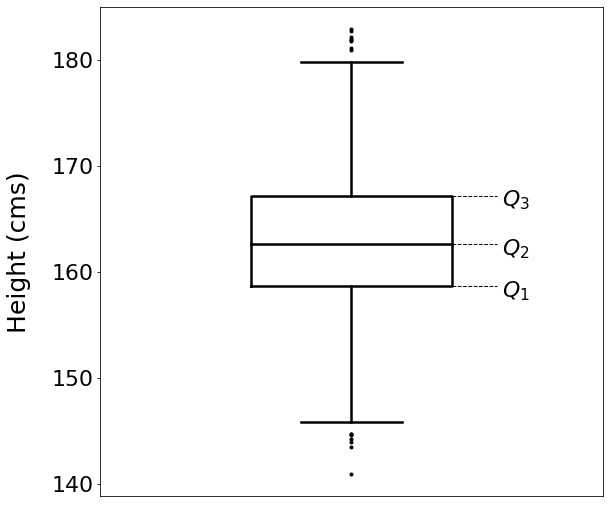

In [16]:
plt.figure(figsize=(9,9))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
# ax = sns.boxplot( data=(stature_women,stature_men))
dots = dict(markerfacecolor='black', marker='.')
median_props = dict(color='black', lw=2.5)
plt.ylabel('Height (cms)',fontsize=font_size,labelpad=20)
ax = plt.boxplot( stature_women,flierprops=dots,medianprops=median_props,whiskerprops=median_props,
                 capprops=median_props,boxprops=median_props,widths=0.4)
plt.hlines(first_quartile_women,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.hlines(median_women,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.hlines(third_quartile_women,1.2,1.29,linewidth=1,ls='dashed',color="black")
plt.text(1.3,first_quartile_women-1,r'$Q_1$',fontsize=font_size_ticks)
plt.text(1.3,median_women-1,r'$Q_2$',fontsize=font_size_ticks)
plt.text(1.3,third_quartile_women-1,r'$Q_3$',fontsize=font_size_ticks)
plt.xticks([])

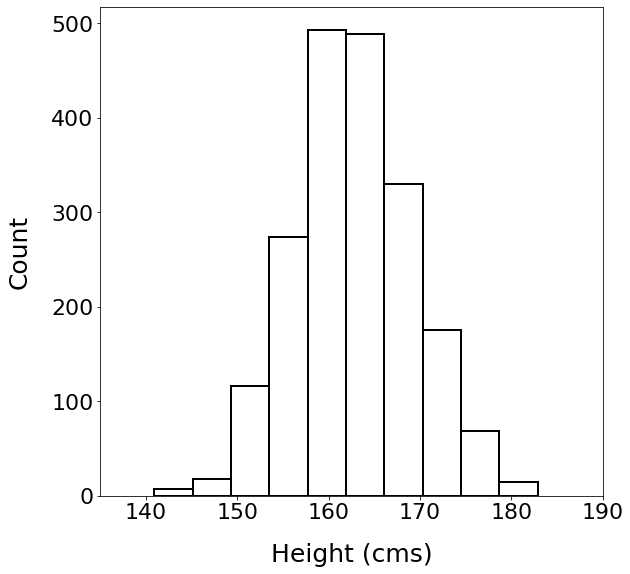

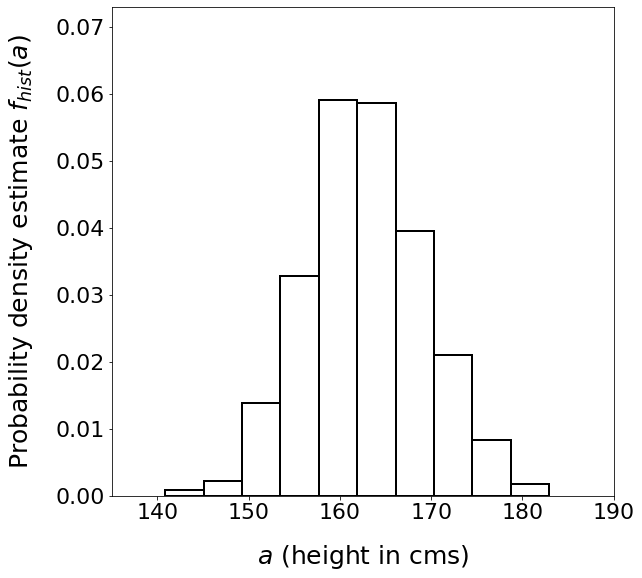

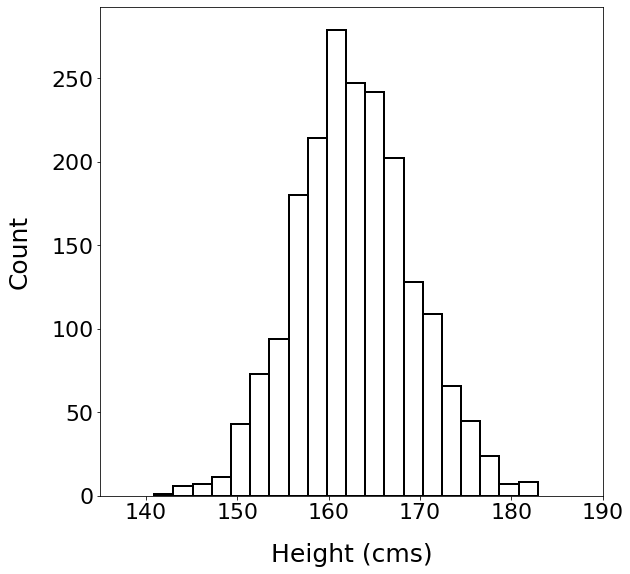

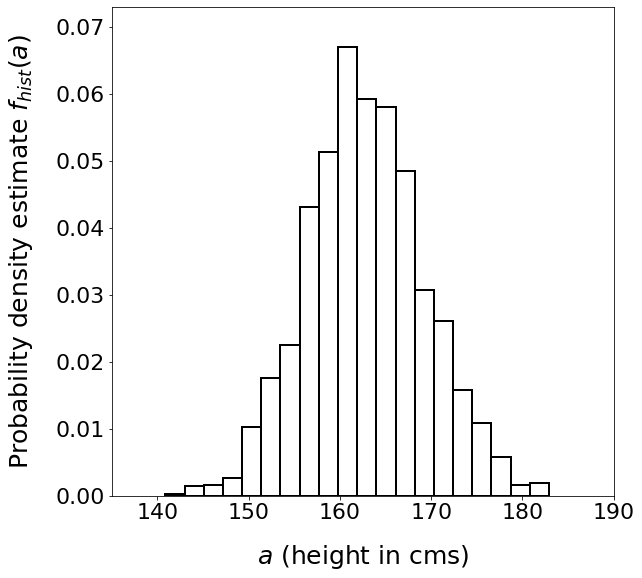

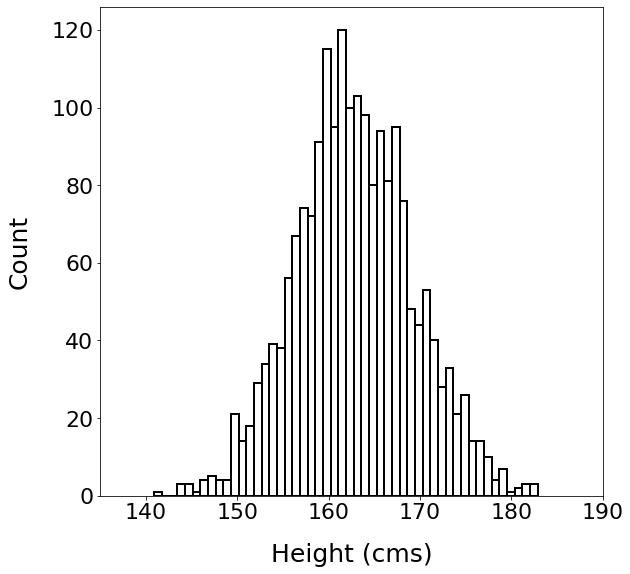

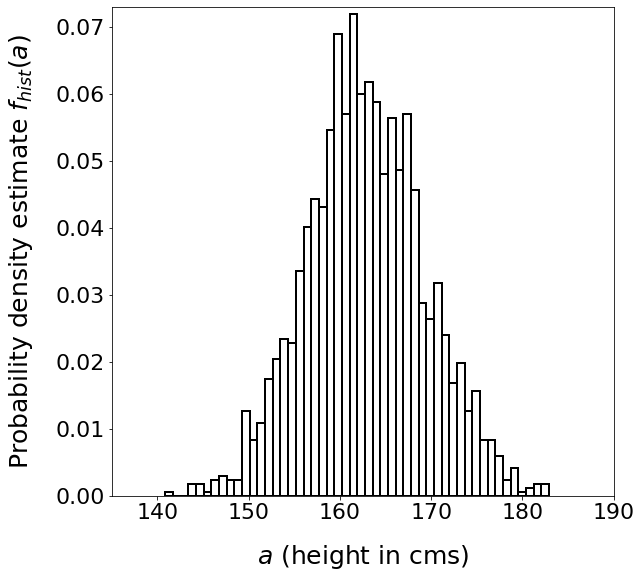

In [17]:
n_bins = [10,20,50]
x_min = 135
x_max = 190
y_max = 0.073

for n in n_bins:

    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(stature_women,bins=n,color='white', edgecolor='black',
              linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylabel("Count",fontsize=font_size,labelpad=20)
    plt.xlabel('Height (cms)',fontsize=font_size,labelpad=20)
    
    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(stature_women,bins=n,color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Probability density estimate $f_{hist}(a)$",fontsize=font_size,labelpad=20)
    plt.xlabel('$a$ (height in cms)',fontsize=font_size,labelpad=20)

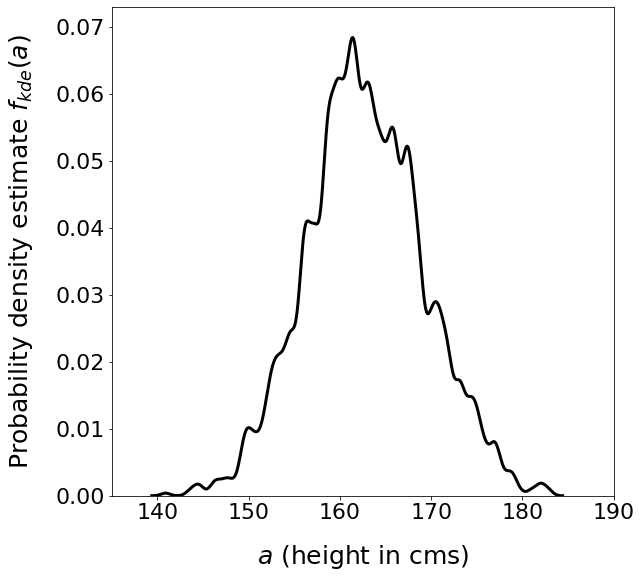

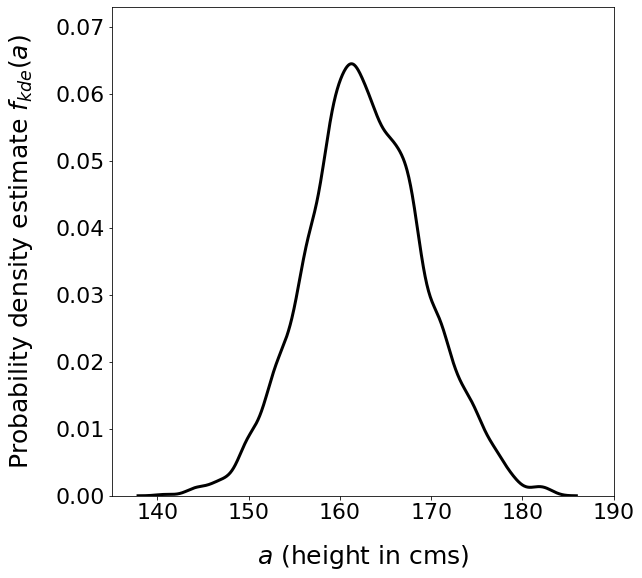

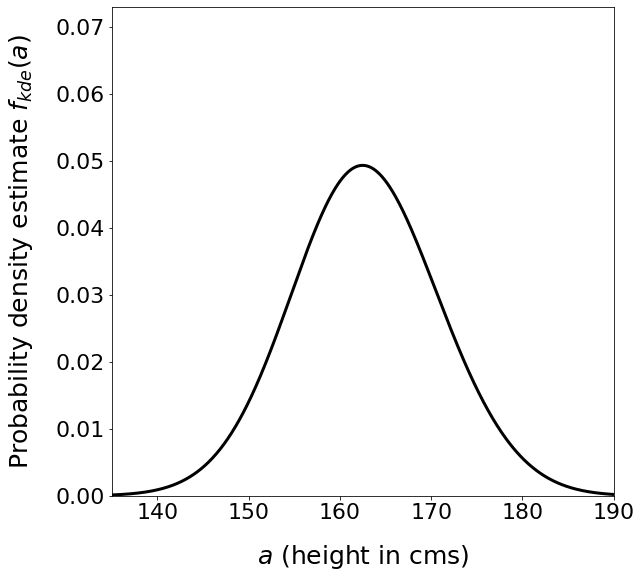

In [18]:
bw_vals = [0.5,1,5]
for bw in bw_vals:

    plt.figure(figsize=(9,9))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    sns.kdeplot(stature_women,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
    plt.xlim([x_min,x_max])
    plt.ylim([0,y_max])
    plt.ylabel(r"Probability density estimate $f_{kde}(a)$",fontsize=font_size,labelpad=20)
    plt.xlabel('$a$ (height in cms)',fontsize=font_size,labelpad=20)

[135.   135.01 135.02]


Text(0.5, 0, '$a$ (height in cms)')

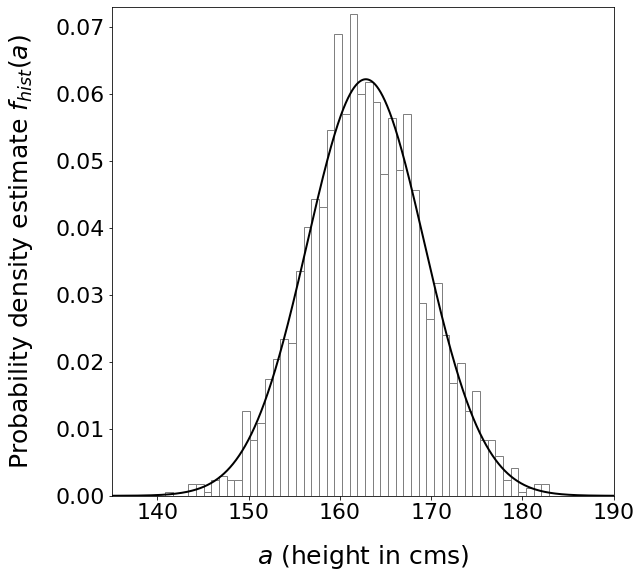

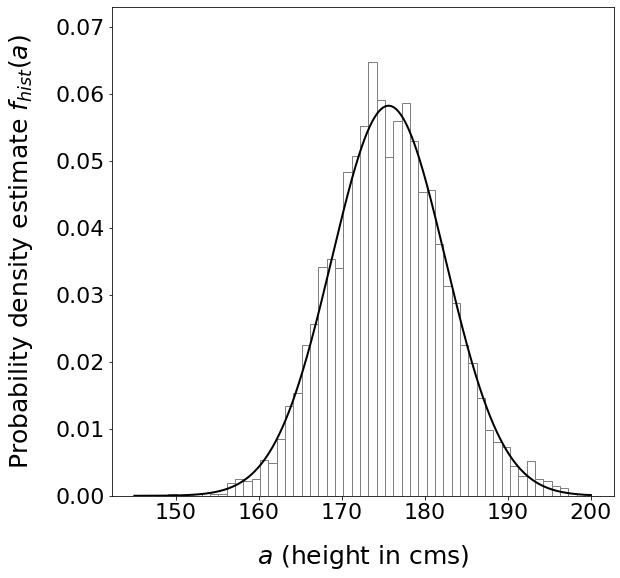

In [39]:
# Gaussian parametric model
mu_ml_women = np.mean(stature_women)
sigma_ml_women = np.std(stature_women)
mu_ml_men = np.mean(stature_men)
sigma_ml_men = np.std(stature_men)

step = 0.01
h_women=np.arange(x_min,x_max+step,step)
print(h[:3])

plt.figure(figsize=(9,9))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_women,bins=n,color='white', edgecolor='gray',
          linewidth=1,density=True)
plt.plot(h_women,norm.pdf(h_women,mu_ml_women,sigma_ml_women),lw=2,color="black")
plt.xlim([x_min,x_max])
plt.ylim([0,y_max])
plt.ylabel(r"Probability density estimate $f_{hist}(a)$",fontsize=font_size,labelpad=20)
plt.xlabel('$a$ (height in cms)',fontsize=font_size,labelpad=20)

h_men=np.arange(145,200+step,step)
plt.figure(figsize=(9,9))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_men,bins=n,color='white', edgecolor='gray',
          linewidth=1,density=True)
plt.plot(h_men,norm.pdf(h_men,mu_ml_men,sigma_ml_men),lw=2,color="black")
plt.ylim([0,y_max])
plt.ylabel(r"Probability density estimate $f_{hist}(a)$",fontsize=font_size,labelpad=20)
plt.xlabel('$a$ (height in cms)',fontsize=font_size,labelpad=20)
